# Regressão 03 - múltiplas

Carregue os pacotes necessários e a base de gorjetas.


In [200]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

%matplotlib inline

In [201]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98



### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, dinner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [202]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [203]:
modelo = sm.OLS(y,X).fit()
tips['res_log'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           2.64e-20
Time:                        15:26:34   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
y, X = patsy.dmatrices('tip ~ net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res_log_net'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           5.02e-23
Time:                        15:26:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

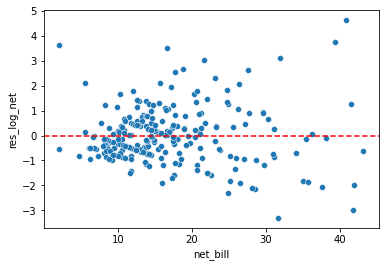

In [205]:
sns.scatterplot(x = 'net_bill', y = 'res_log_net', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [206]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill) + 1', tips)
modelo_tip = sm.OLS(y,X).fit()
tips['res_log_net_log'] = modelo_tip.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           5.02e-23
Time:                        15:26:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

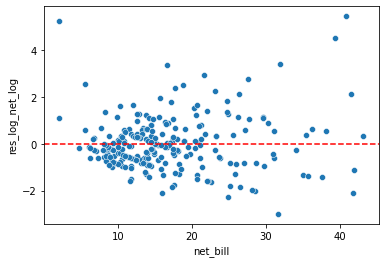

In [207]:
sns.scatterplot(x = 'net_bill', y = 'res_log_net_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [208]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill,2) + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res_log_net_power'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           1.47e-20
Time:                        15:26:35   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

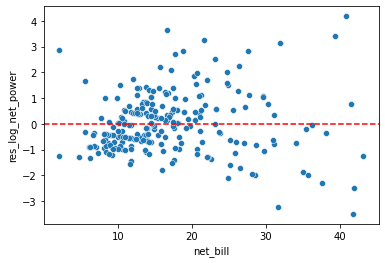

In [209]:
sns.scatterplot(x = 'net_bill', y = 'res_log_net_power', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Todos modelos apresentam distribuição dos erros similares. Então, escolheremos o primeiro modelo por apresentar maior R2.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, dinner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [210]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res_log_tippct'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           3.16e-13
Time:                        15:26:35   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.032      0.000      -1.447      -1.130
sex[T.Female]      0.0168      0.052      0.323      0.747      -0.085       0.119
smoker[T.No]      -0.0055      0.050     -0.110      0.912      -0.104       0.093
time[T.Dinner]     0.0171      0.056      0.307      0.759      -0.093       0.127
net_bill          -0.0259      0.003     -8.371      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.301   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.688
Skew:                           0.650   Prob(JB):                     1.82e-56
Kurtosis:                       7.854   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res_log_tippct_net'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           8.27e-16
Time:                        15:26:35   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

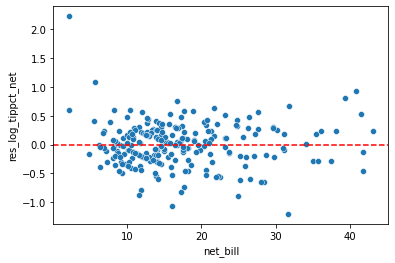

In [212]:
sns.scatterplot(x = 'net_bill', y = 'res_log_tippct_net', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [213]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ np.log(net_bill) + 1', tips)
modelo_log = sm.OLS(y,X).fit()
tips['res_log_tippct_net_log'] = modelo_log.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           8.27e-16
Time:                        15:26:35   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

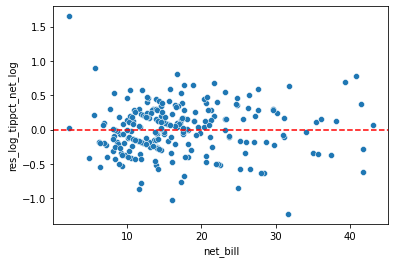

In [214]:
sns.scatterplot(x = 'net_bill', y = 'res_log_tippct_net_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [215]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill,2) + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res_log_tippct_net_power'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           1.47e-20
Time:                        15:26:36   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

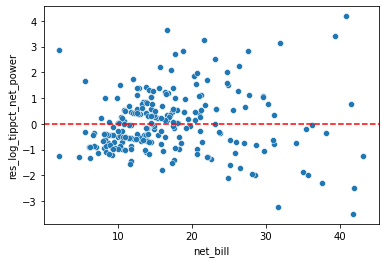

In [216]:
sns.scatterplot(x = 'net_bill', y = 'res_log_tippct_net_power', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O modelo log-log tem maior r2 e uma boa distribuição dos resíduos, escolheremos este.

- Valores preditos pelos modelos escolhidos

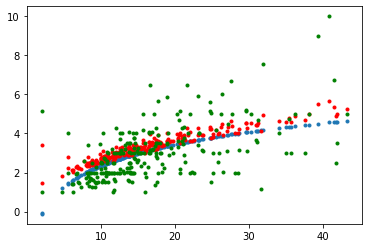

In [217]:
tips['pred_tip'] = modelo_tip.fittedvalues
tips['pred_tip_pct'] = np.exp(modelo_log.fittedvalues)*tips.total_bill

plt.plot(tips['net_bill'], tips['pred_tip'], '.')
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r.')
plt.plot(tips['net_bill'], tips['tip'], 'g.')

In [218]:
modelo_tip.rsquared

0.2944412513792952

In [219]:
r2_score(tips['tip'],tips['pred_tip_pct'])

0.4722122890491901

O modelo 2 log, tem maior r2 e de comporta melhor com os dados pelo gráfico.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [220]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15000.0,7499.500000,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
index,15000.0,8298.753467,4800.904442,0.000000,4111.750000,8330.500000,12469.000000,16649.000000
qtd_filhos,15000.0,0.437267,0.760594,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.841400,11.229170,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12466.0,7.750462,6.780216,0.191781,3.016438,6.016438,10.183562,42.906849
qt_pessoas_residencia,15000.0,2.219067,0.922352,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,4624.632946,4628.571729,159.900000,1945.740000,3278.260000,5642.365000,89918.040000


In [222]:
df_drop = df.dropna(subset=['tempo_emprego'])

In [223]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12466.0,7513.599711,4340.440720,0.000000,3753.500000,7542.500000,11284.500000,14999.000000
index,12466.0,8383.234077,4792.750858,0.000000,4264.250000,8458.500000,12540.750000,16649.000000
qtd_filhos,12466.0,0.517327,0.804358,0.000000,0.000000,0.000000,1.000000,14.000000
idade,12466.0,40.701989,9.362546,22.000000,33.000000,40.000000,48.000000,67.000000
tempo_emprego,12466.0,7.750462,6.780216,0.191781,3.016438,6.016438,10.183562,42.906849
qt_pessoas_residencia,12466.0,2.313653,0.955471,1.000000,2.000000,2.000000,3.000000,15.000000
renda,12466.0,4850.045256,4873.182512,159.900000,2026.390000,3422.440000,5916.970000,89918.040000


In [224]:
reg_drop = smf.ols('renda ~ tempo_emprego', data = df_drop).fit()
reg_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:26:36   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Artur\AppData\Local\Temp/ipykernel_23728/4135568525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['residuos'] = reg_drop.resid


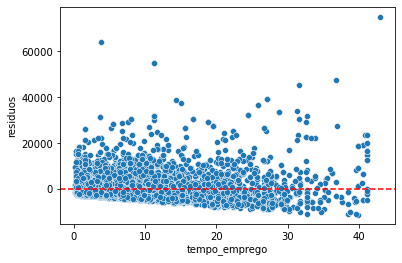

In [225]:
df_drop['residuos'] = reg_drop.resid
sns.scatterplot(x = 'tempo_emprego', y = 'residuos', data = df_drop)
plt.axhline(y=0, color='r', linestyle='--')

Tentaremos melhorar através de um polinômio na explicativa

In [226]:
reg_power = smf.ols('renda ~ np.power(tempo_emprego,2)', data = df_drop).fit()
reg_power.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:26:37   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3789.9264     45.197     83.854      0.000    3701.334    3878.519
np.power(tempo_emprego, 2)     9.9976      0.201     49.780      0.000       9.604      10.391
==============================================================================
Omnibus:                     9652.373   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333382.424
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      27.391   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Artur\AppData\Local\Temp/ipykernel_23728/3166873146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['residuos_power'] = reg_power.resid


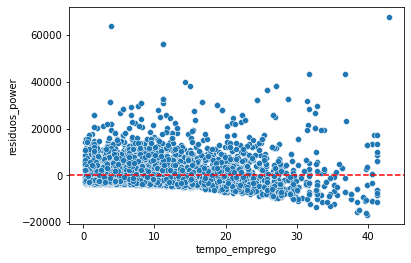

In [227]:
df_drop['residuos_power'] = reg_power.resid
sns.scatterplot(x = 'tempo_emprego', y = 'residuos_power', data = df_drop)
plt.axhline(y=0, color='r', linestyle='--')

In [230]:
reg = smf.ols('renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil)+ C(tipo_residencia) + idade + qt_pessoas_residencia +  np.power(tempo_emprego,2)', 
              data = df_drop).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     156.3
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:26:44   Log-Likelihood:            -1.2190e+05
No. Observations:               12466   AIC:                         2.439e+05
Df Residuals:                   12441   BIC:                         2.440e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            1299.2068   1663.146      0.781      0.435   -1960.818    4559.231
C(sexo)[T.M]                         2361.5597     87.450     27.005      0.000    2190.145    2532.974
C(posse_de_veiculo)[T.True]           -61.0994     84.123     -0.726      0.468    -225.994     103.795
C(posse_de_imovel)[T.True]            298.3343     82.817      3.602      0.000     136.000     460.668
C(tipo_renda)[T.Bolsista]              17.6406   2140.292      0.008      0.993   -4177.663    4212.944
C(tipo_renda)[T.Empresário]          1015.9798     89.489     11.353      0.000     840.568    1191.392
C(tipo_renda)[T.Pensionista]         1891.2240   1427.258      1.325      0.185    -906.422    4688.870
C(tipo_renda)[T.Servidor público]     563.4280    129.283      4.358      0.000     310.013     816.843
C(educacao)[T.Pós graduação]         2119.3793   1073.483      1.974      0.048      15.187    4223.572
C(educacao)[T.Secundário]            -117.2554    434.672     -0.270      0.787    -969.279     734.769
C(educacao)[T.Superior completo]      461.9904    436.491      1.058      0.290    -393.599    1317.579
C(educacao)[T.Superior incompleto]   -266.8499    467.652     -0.571      0.568   -1183.521     649.821
C(estado_civil)[T.Separado]          -170.9863    800.490     -0.214      0.831   -1740.071    1398.099
C(estado_civil)[T.Solteiro]           -39.8451    785.798     -0.051      0.960   -1580.131    1500.441
C(estado_civil)[T.União]              -96.2253    142.751     -0.674      0.500    -376.039     183.588
C(estado_civil)[T.Viúvo]             -217.9393    822.038     -0.265      0.791   -1829.260    1393.382
C(tipo_residencia)[T.Casa]           -242.1947    326.266     -0.742      0.458    -881.727     397.337
C(tipo_residencia)[T.Com os pais]    -618.6104    365.901     -1.691      0.091   -1335.833      98.612
C(tipo_residencia)[T.Comunitário]    -608.6597    629.620     -0.967      0.334   -1842.813     625.494
C(tipo_residencia)[T.Estúdio]        -734.7067    543.385     -1.352      0.176   -1799.825     330.411
C(tipo_residencia)[T.Governamental]  -785.9400    394.457     -1.992      0.046   -1559.137     -12.743
qtd_filhos                             -5.3123    783.772     -0.007      0.995   -1541.627    1531.002
idade                                  26.1461      4.782      5.468      0.000      16.773      35.519
qt_pessoas_residencia                 101.2168    782.297      0.129      0.897   -1432.205    1634.639
np.power(tempo_emprego, 2)             10.5697      0.208     50.855      0.000      10.162      10.977
==============================================================================
Omnibus:                     9682.207   Durbin-Watson:                   2.020
Prob(Omnibus)

In [231]:
reg = smf.ols('renda ~ C(sexo) + C(posse_de_imovel) + tipo_renda + C(educacao) + tipo_residencia + idade + qt_pessoas_residencia +   np.power(tempo_emprego,2)', 
              data = df_drop).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     208.4
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:26:45   Log-Likelihood:            -1.2190e+05
No. Observations:               12466   AIC:                         2.438e+05
Df Residuals:                   12447   BIC:                         2.440e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1215.2636    578.516      2.101      0.036      81.284    2349.244
C(sexo)[T.M]                        2353.8998     81.964     28.719      0.000    2193.237    2514.563
C(posse_de_imovel)[T.True]           298.1241     82.645      3.607      0.000     136.127     460.121
tipo_renda[T.Bolsista]                79.4607   2139.468      0.037      0.970   -4114.228    4273.149
tipo_renda[T.Empresário]            1015.0601     89.292     11.368      0.000     840.034    1190.086
tipo_renda[T.Pensionista]           1911.5111   1426.741      1.340      0.180    -885.122    4708.144
tipo_renda[T.Servidor público]       565.8955    129.219      4.379      0.000     312.606     819.185
C(educacao)[T.Pós graduação]        2121.3688   1072.220      1.978      0.048      19.651    4223.086
C(educacao)[T.Secundário]           -108.0912    434.160     -0.249      0.803    -959.111     742.929
C(educacao)[T.Superior completo]     464.7213    435.677      1.067      0.286    -389.273    1318.716
C(educacao)[T.Superior incompleto]  -256.2238    467.045     -0.549      0.583   -1171.703     659.256
tipo_residencia[T.Casa]             -249.2654    325.999     -0.765      0.445    -888.273     389.742
tipo_residencia[T.Com os pais]      -629.9043    365.588     -1.723      0.085   -1346.513      86.704
tipo_residencia[T.Comunitário]      -620.4770    629.188     -0.986      0.324   -1853.783     612.829
tipo_residencia[T.Estúdio]          -751.8483    543.082     -1.384      0.166   -1816.374     312.677
tipo_residencia[T.Governamental]    -794.0512    394.292     -2.014      0.044   -1566.925     -21.177
idade                                 26.1305      4.623      5.652      0.000      17.068      35.193
qt_pessoas_residencia                114.3457     41.836      2.733      0.006      32.340     196.351
np.power(tempo_emprego, 2)            10.5803      0.207     51.068      0.000      10.174      10.986
==============================================================================
Omnibus:                     9683.578   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           362841.856
Skew:                           3.411   Prob(JB):                         0.00
Kurtosis:                      28.535   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos ver os valores dos parâmetros acima, onde um varia conforme seu parâmetro, dados os outros constantes.

C:\Users\Artur\AppData\Local\Temp/ipykernel_23728/3555202563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['residuos_multi'] = reg.resid


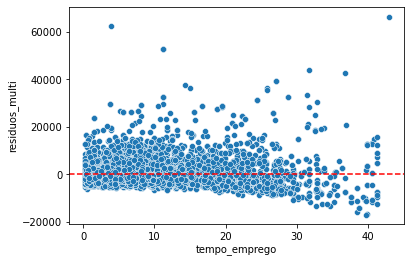

In [232]:
df_drop['residuos_multi'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'residuos_multi', data = df_drop)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\Artur\AppData\Local\Temp/ipykernel_23728/603882833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['pred_renda'] = reg_power.fittedvalues
C:\Users\Artur\AppData\Local\Temp/ipykernel_23728/603882833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['pred_renda_2'] = reg.fittedvalues
C:\Users\Artur\AppData\Local\Temp/ipykernel_23728/603882833.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword arg

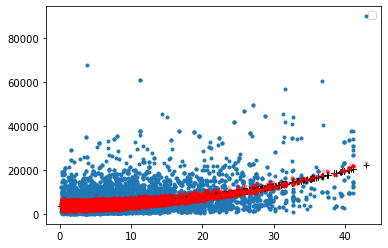

In [247]:
df_drop['pred_renda'] = reg_power.fittedvalues
df_drop['pred_renda_2'] = reg.fittedvalues

plt.plot(df_drop['tempo_emprego'], df_drop['renda'], '.')
plt.plot(df_drop['tempo_emprego'], df_drop['pred_renda'], 'k.', marker = '+')
plt.plot(df_drop['tempo_emprego'], df_drop['pred_renda_2'], 'r.', alpha = 0.2)
plt.legend()

Temos um ajuste aceitável para o modelo com bastante espaço para melhora.